In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

from functools import reduce

In [3]:
def read_cred():
    f = open("../../../cred.txt", "r")
    cred = f.read()
    f.close()
    return cred

In [4]:
def get_OI(url,start,end,interval='PT1M',tag='xx',auth='xx',hS='00',hF='23'):
	url_all =url+'data-reference='+tag+'&aggregation=TIME'+'&aggregation-function=MEAN'+"&from="+start+"T"+hS+"%3A00%3A00.000Z&to="+end+"T"+hF+"%3A59%3A59.000Z&aggregation-period="+interval
	d_data = pd.read_json(url_all,storage_options={ 'Authorization': 'basic '+ auth})
	# print(d_data['values'][0])
	arr = np.asarray(np.asarray(d_data['values'])[0])
	return d_data['values'][0]

In [5]:
def get_data(tags):
    liste = list(range(0))
    for tag in tags:
        print(tag)
        data = get_OI(urlBase,start_date,end_date,resolution,tag,credentials,'00','23')
        df = pd.DataFrame(data)
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df = df.set_index('timestamp')
        df = df.rename(columns={'value':tag})
        liste.append(df)
    return liste

In [6]:
def merge_data(liste):
    df = reduce(lambda left,right : pd.merge(left, right,left_index=True,right_index=True,how='outer'),liste)
    return df

In [7]:
# for tag in tags:
#     plt.figure(figsize=(8,6))
# # plt.plot(result[tags[0]],label=tags[0])
#     plt.subplot(121)
#     plt.scatter(result.index ,result[tag],label=tag, c='b', alpha=0.3)
#     plt.legend()
#     plt.subplot(122)
#     sns.histplot(result[tag],label=tag,kde=True,common_norm=True)
#     plt.legend()

# Filtre

In [8]:
def filtering(df):
    df = df[(df['ROC_Bruit_160Hz']>50)]
    df = df[(df['S-FCX69604']>10000)]
    df = df[(df['S-FQ31016']>10000)]
    df = df[(df['ROC_S1_Air_GN']>18)]
    df = df[(df['ROC_S1_Air_GN']<22)]
    df = df[(df['5A-Q98901A']<0.5)]
    return df

In [9]:
def filteringE2(df):
    df = df[(df['ROC_Bruit_160Hz']>50)]
    df = df[(df['E-FCX68604']>10000)]
    df = df[(df['E-FQ31016']>10000)]
    df = df[(df['ROC_S1_Air_GN']>18)]
    df = df[(df['ROC_S1_Air_GN']<22)]
    df = df[(df['5A-Q98901A']<0.5)]
    return df

In [10]:
def get_perf(row):
    crit = 'ROC_Bruit_160Hz'
    if row['ROC_Bruit_160Hz'] > 75:
        ret=10
    elif row['ROC_Bruit_160Hz']>73:
        ret=9
    elif row['ROC_Bruit_160Hz']>71:
        ret=8
    elif row['ROC_Bruit_160Hz']>69:
        ret=7
    elif row['ROC_Bruit_160Hz']>67:
        ret=6
    elif row['ROC_Bruit_160Hz']>65:
        ret=5
    elif row['ROC_Bruit_160Hz']>63:
        ret=4
    elif row['ROC_Bruit_160Hz']>61:
        ret=3
    elif row['ROC_Bruit_160Hz']>59:
        ret=2
    elif row['ROC_Bruit_160Hz']>57:
        ret=1
    else:
        ret =0
    return ret   

In [11]:
def perf_auto(tag,df):
    # print( df[tag].quantile(0.5) )
    # print(df[tag].describe())
    grid=[]
    for i in range(10,100,10):
        grid.append(df[tag].quantile(i/100.0))
    # print(grid)
    return grid

In [12]:
def get_perf2(row):
    v=row['5A-Q98901A']
    for i in range(9):
        if v<perf_grid[i]:
            return i
    return 9

Variables Globales

In [13]:
urlBase = 'https://oianalytics-100.optimistik.fr/api/oianalytics/time-values/query?'
credentials = read_cred()

Variables Spécifiques

In [14]:
start_date = '2022-01-01'
end_date = '2022-05-25'
resolution = 'PT30M'
tags = ['3B-T99994','ROC_Bruit_160Hz','5A-Q98901B','S-FCX69604','ROC_S1_Air_GN','S-FCQX69121','S-S69615','S-FCX69606','S-FQ31016','S-F69703','5A-Q98901A']
tags_E2 = ['ROC_Bruit_160Hz','5A-Q98901B','E-FCX68604','ROC_S1_Air_GN','E-FCQX68121','E-S68613','E-FCX68606','E-FQ31016','E-F68503','5A-Q98901A']
#tags = ['E-T15223','E-T18223','3B-T99994','E-FC16325','E-FCS14325','E-FCS12085','E-FS31053','E-FC33005','E-FQ41504','E-QUR-E2']
#tags = ['E-T15223','E-T18223','E-FCS14325','E-FC16325','E-FCS12085','E-LS18603','E-LC18604','E-LS15603','E-LC15604','E-FS31053','E-PD15010','E-PD18010','3B-T99994','E-QUR-E2','ROC_E2_Prod_MMP_brut','E-FQ41504','E-TC18202','E-TC15202']

In [15]:
df_list = get_data(tags)
data = merge_data(df_list)
result = data.copy()
result = filtering(result)
perf_grid =perf_auto('5A-Q98901A',result)
result['perf'] = result.apply(get_perf2,axis=1)
result.describe()

3B-T99994
ROC_Bruit_160Hz
5A-Q98901B
S-FCX69604
ROC_S1_Air_GN
S-FCQX69121
S-S69615
S-FCX69606
S-FQ31016
S-F69703
5A-Q98901A


,3B-T99994,ROC_Bruit_160Hz,5A-Q98901B,S-FCX69604,ROC_S1_Air_GN,S-FCQX69121,S-S69615,S-FCX69606,S-FQ31016,S-F69703,5A-Q98901A,perf
count,5302.000000,5302.000000,5302.000000,5302.000000,5302.000000,5302.000000,5302.000000,5302.000000,5302.000000,5302.000000,5302.000000,5302.00000
mean,13.619633,69.588978,0.059838,16625.450866,20.614997,807.130470,1253.151357,8352.087717,29199.487214,5544.117999,0.213756,4.50000
std,7.285595,3.351140,0.020055,1801.462548,0.498394,91.547562,51.457504,1810.371763,3012.134603,904.156982,0.060053,2.87334
min,-1.103999,62.204198,0.026656,10169.805667,19.121832,470.899933,1128.739333,4784.289333,10604.620667,975.015000,0.118564,0.00000
25%,8.294041,67.223808,0.047191,15420.857500,20.011637,749.398342,1221.997000,6968.122000,29445.345833,5066.424083,0.172568,2.00000
50%,12.790600,68.981289,0.054680,16496.593333,20.960316,796.062617,1269.639000,8168.173667,29942.460000,5587.137333,0.197337,4.50000
75%,18.649918,71.204393,0.065435,17646.245000,21.004949,858.959667,1289.048917,9521.114167,30600.218333,6161.347833,0.237924,7.00000
max,35.420813,86.620257,0.232871,22688.896667,21.920009,1079.512000,1339.574333,14785.120000,31360.233333,7623.484333,0.498601,9.00000


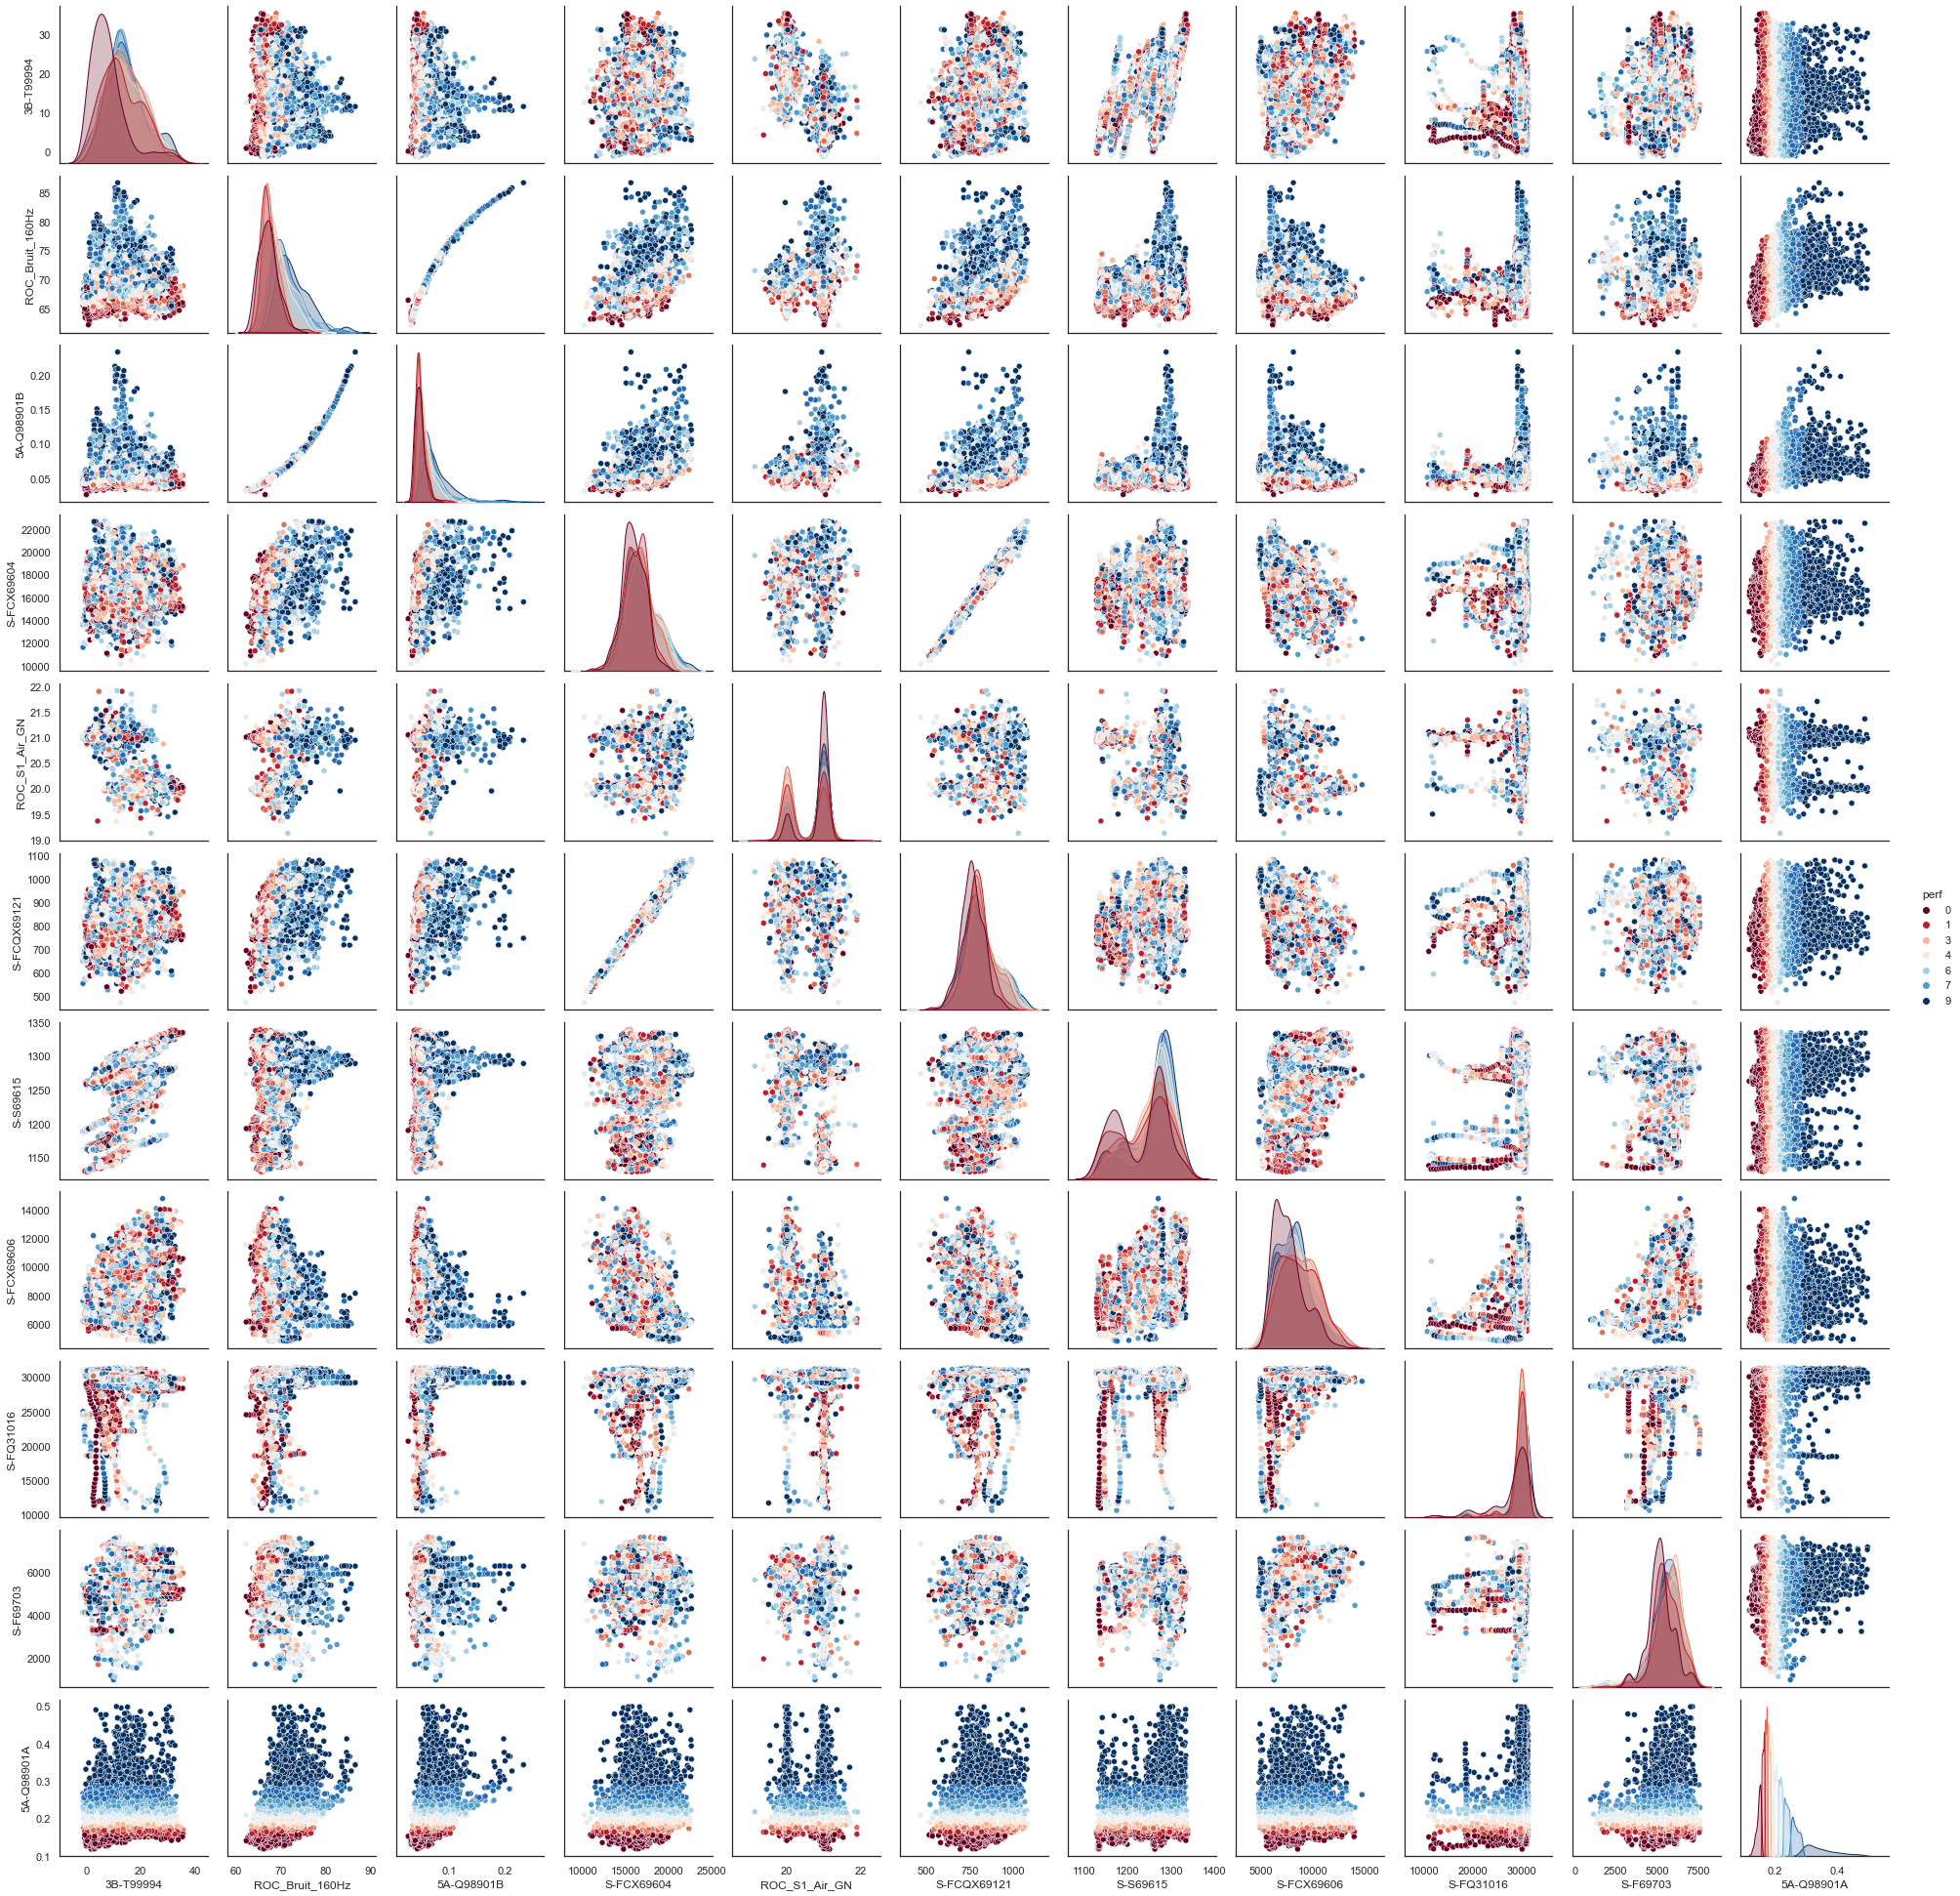

In [16]:
# sns.set_theme(style="ticks")
sns.set_theme(style='white',palette='Blues')
sns.color_palette("tab10")
sns.pairplot(data=result, hue='perf',palette='RdBu') 

In [47]:
start_date = '2022-06-01'
end_date = '2022-06-06'
resolution = 'PT10M'
tags = ['3B-T99994','ROC_S1_Air_GN','S-FQ31016','E-FC16325','S-FC16325','B-FC23008']
df_list = get_data(tags)
data = merge_data(df_list)
data.describe()

3B-T99994
ROC_S1_Air_GN
S-FQ31016
E-FC16325
S-FC16325
B-FC23008


,3B-T99994,ROC_S1_Air_GN,S-FQ31016,E-FC16325,S-FC16325,B-FC23008
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000
mean,24.183759,19.999763,28771.758967,6434.376906,7121.509112,26652.854174
std,5.182971,0.125623,1559.861278,2536.199904,401.427425,5517.500138
min,14.074690,18.934384,24170.950000,0.698331,5929.532000,14433.890000
25%,20.031595,19.959184,28980.985000,6303.276500,7205.022000,25958.170000
50%,24.070520,20.002130,29191.280000,7943.060000,7223.655000,29973.710000
75%,27.756530,20.036819,29439.245000,7955.591000,7252.975000,30781.710000
max,36.736850,21.065826,30127.940000,7981.772000,7445.372000,31068.410000


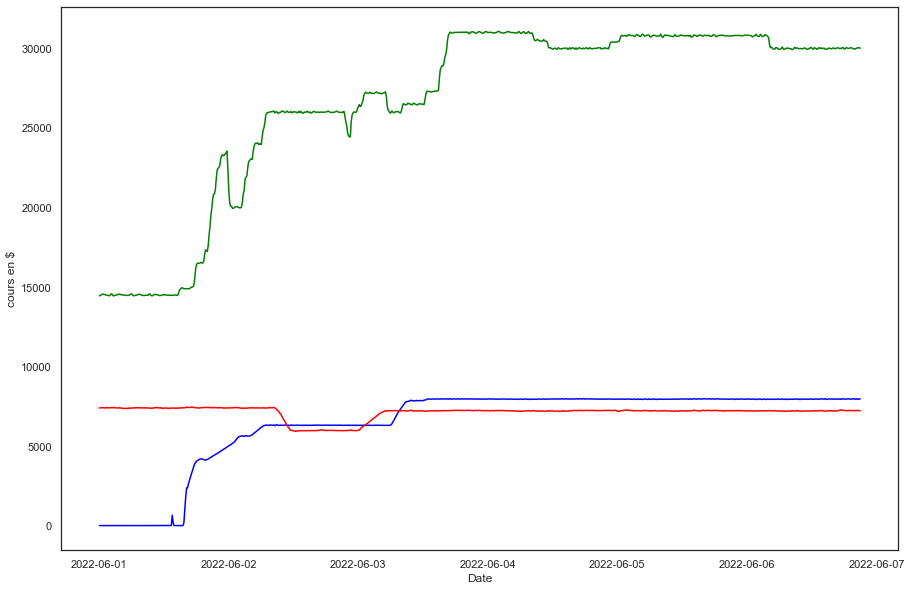

In [48]:
plt.figure(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('cours en $')
plt.plot(data['E-FC16325'],c='b')
plt.plot(data['S-FC16325'],c='r')
plt.plot(data['B-FC23008'],c='g')
plt.show()